In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
term_data = pd.read_csv('term-deposit-marketing-2020.csv')
term_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
term_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [4]:
term_data['y'].value_counts()

y
no     37104
yes     2896
Name: count, dtype: int64

### Looking at the different features

### AGE

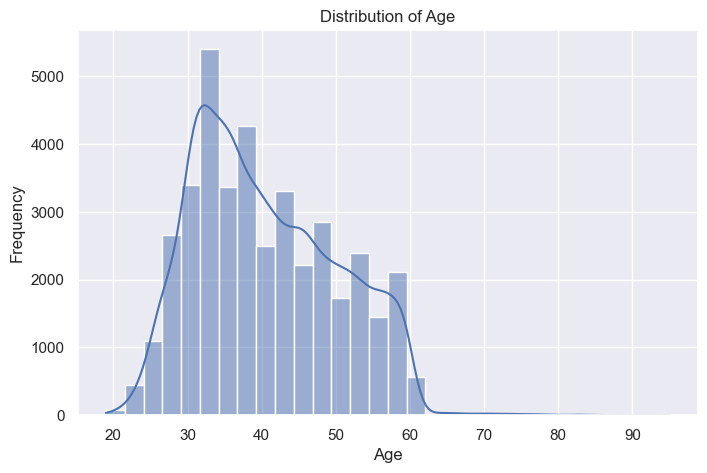

In [6]:
sns.set()
plt.figure(figsize=(8, 5))
sns.histplot(term_data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

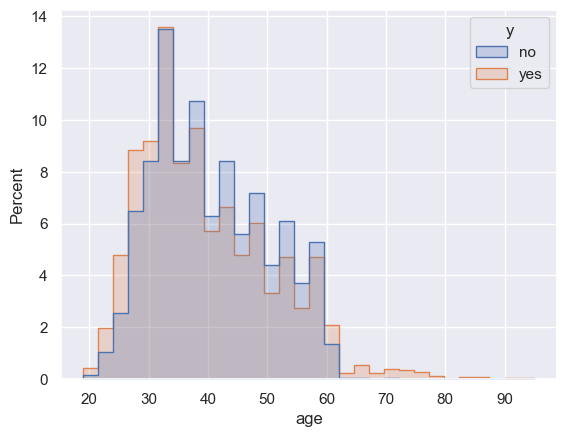

In [22]:
# Plot without custom labels to see the default
sns.histplot(data=term_data, x='age', hue='y', bins=30, element='step', 
             stat='percent', common_norm=False)
plt.show()  # Check what the default legend shows

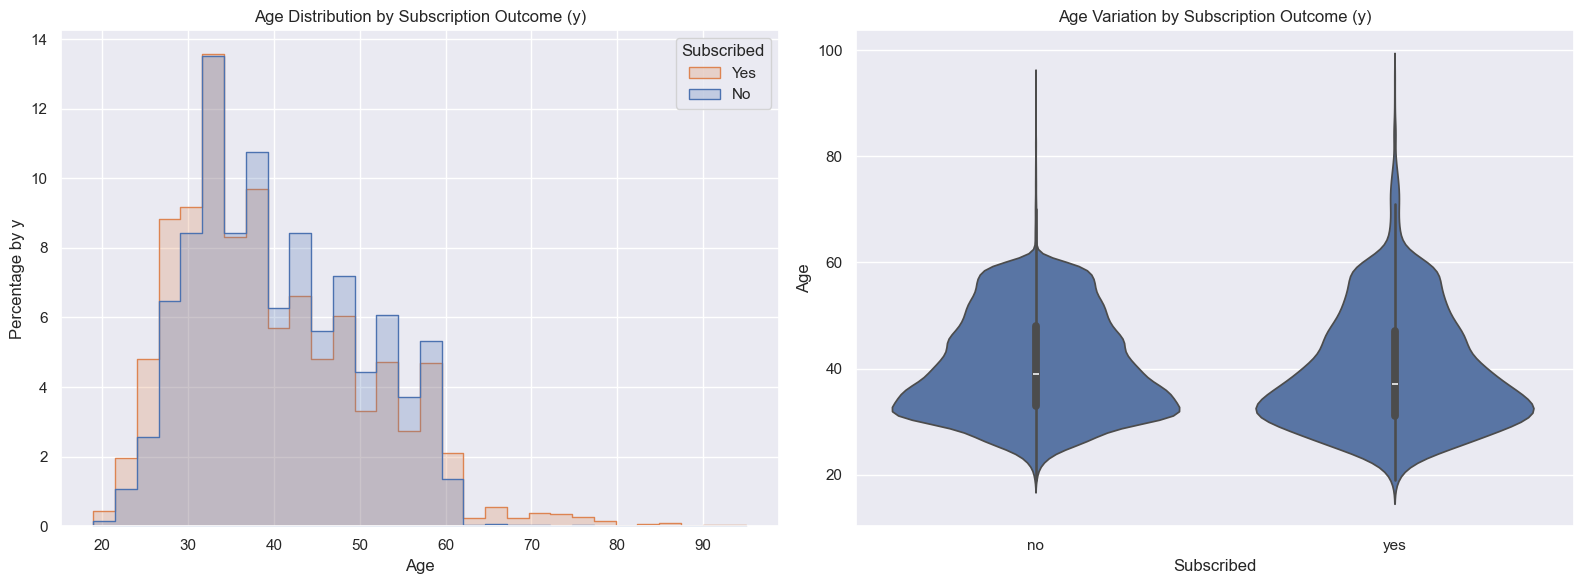

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Histograms for 'age' by 'y'
sns.histplot(data=term_data, x='age', hue='y', bins=30, element='step', stat='percent', common_norm=False, ax=axes[0])
axes[0].set_title('Age Distribution by Subscription Outcome (y)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Percentage by y')
axes[0].legend(title='Subscribed', loc='upper right', labels=['Yes', 'No'])

# Subplot 2: Violinplot for 'age' by 'y'
sns.violinplot(data=term_data, x='y', y='age', ax=axes[1])
axes[1].set_title('Age Variation by Subscription Outcome (y)')
axes[1].set_xlabel('Subscribed')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

### Age in general, does not show any particular distinctions for the two y classes, in terms of relative percentages.

In [17]:
# Create a new column 'age_group' based on the specified bins
age_bins = [0, 30, 45, 60, np.inf]
age_labels = ['<30', '30-45', '45-60', '>60']
term_data['age_group'] = pd.cut(term_data['age'], bins=age_bins, labels=age_labels, right=False)

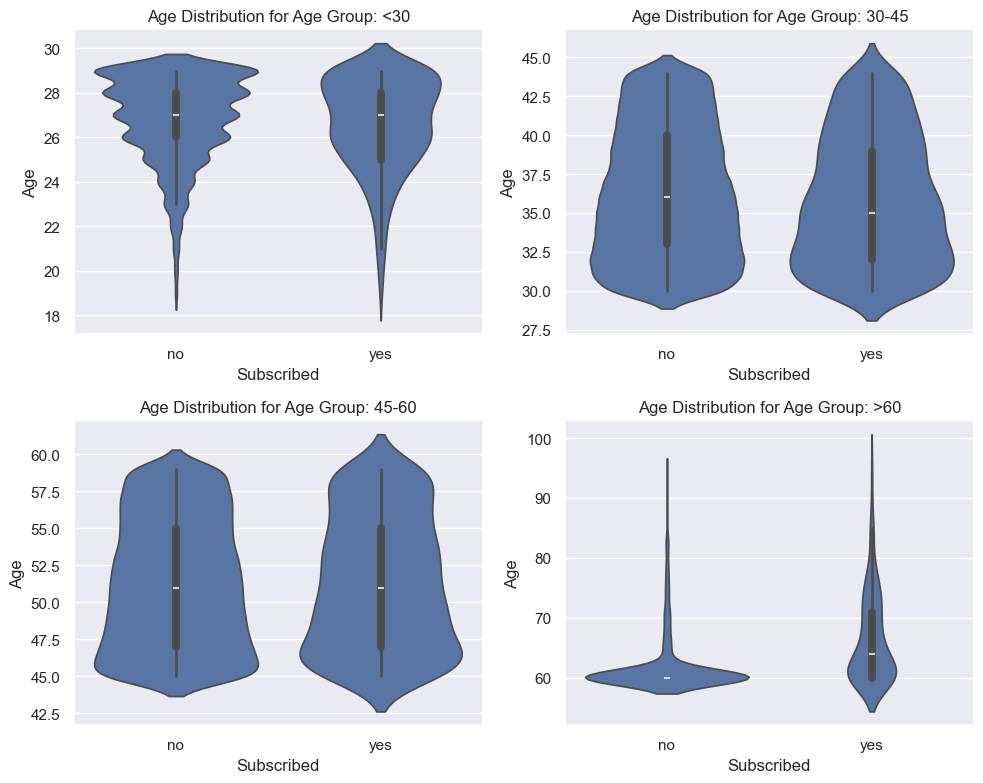

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
age_group_list = term_data['age_group'].cat.categories

for idx, age_group in enumerate(age_group_list):
    ax = axes[idx // 2, idx % 2]
    sns.violinplot(
        data=term_data[term_data['age_group'] == age_group],
        x='y', y='age', ax=ax
    )
    ax.set_title(f'Age Distribution for Age Group: {age_group}')
    ax.set_xlabel('Subscribed')
    ax.set_ylabel('Age')

plt.tight_layout()
plt.show()

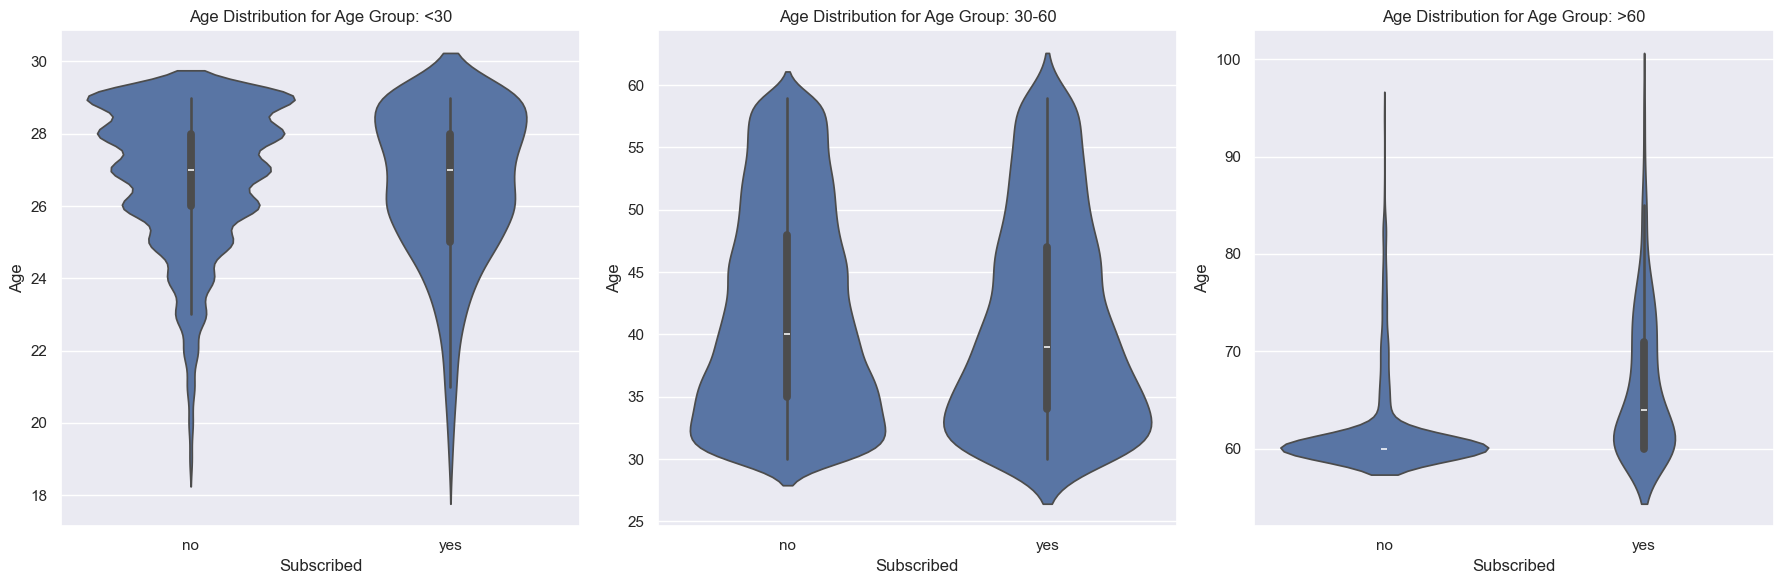

In [24]:
# Define new bins and labels for age groups: <30, 30-60, >60
new_age_bins = [0, 30, 60, np.inf]
new_age_labels = ['<30', '30-60', '>60']
term_data['age_group_new'] = pd.cut(term_data['age'], bins=new_age_bins, labels=new_age_labels, right=False)

# Prepare subplots for each new age group
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, age_group in enumerate(new_age_labels):
    ax = axes[idx]
    sns.violinplot(
        data=term_data[term_data['age_group_new'] == age_group],
        x='y', y='age', ax=ax
    )
    ax.set_title(f'Age Distribution for Age Group: {age_group}')
    ax.set_xlabel('Subscribed')
    ax.set_ylabel('Age')

plt.tight_layout()
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_56432\2359779098.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = term_data.groupby(['age_group', 'y']).size().reset_index(name='count')
C:\Users\samar\AppData\Local\Temp\ipykernel_56432\2359779098.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_y_by_age_group = term_data.groupby('age_group')['y_encoded'].mean().reset_index()


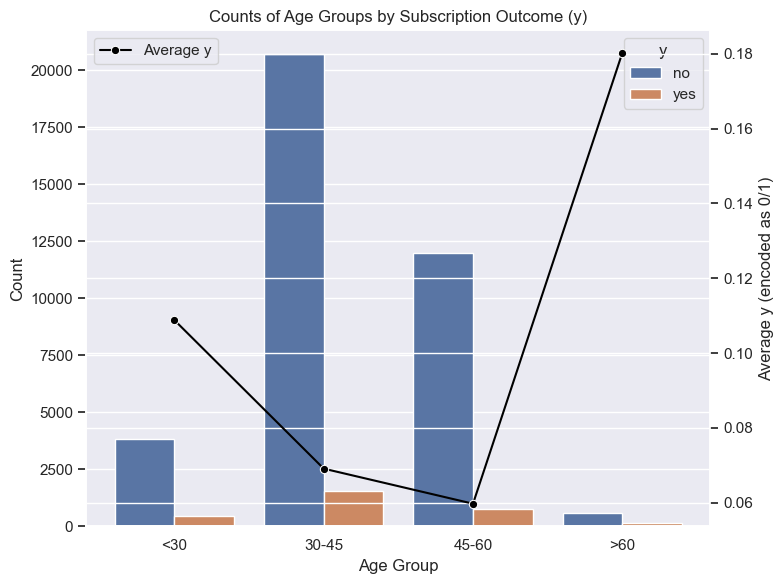

In [44]:
# Count of each age_group by y
age_group_counts = term_data.groupby(['age_group', 'y']).size().reset_index(name='count')

# Average y (encoded as 0/1) by age_group
avg_y_by_age_group = term_data.groupby('age_group')['y_encoded'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(8, 6))

# Barplot: counts by age_group and y
sns.barplot(
    data=age_group_counts,
    x='age_group',
    y='count',
    hue='y',
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Age Group')
ax1.set_title('Counts of Age Groups by Subscription Outcome (y)')

# Line plot: average y_encoded by age_group
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_age_group,
    x='age_group',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y'
)
ax2.set_ylabel('Average y (encoded as 0/1)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Thus, a new feature categorizing the age into the above 3 groups can be a distinguishing feature, where age group>60 can be used for differentiating between yes and no subscriptions.

### BALANCE

In [28]:
term_data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


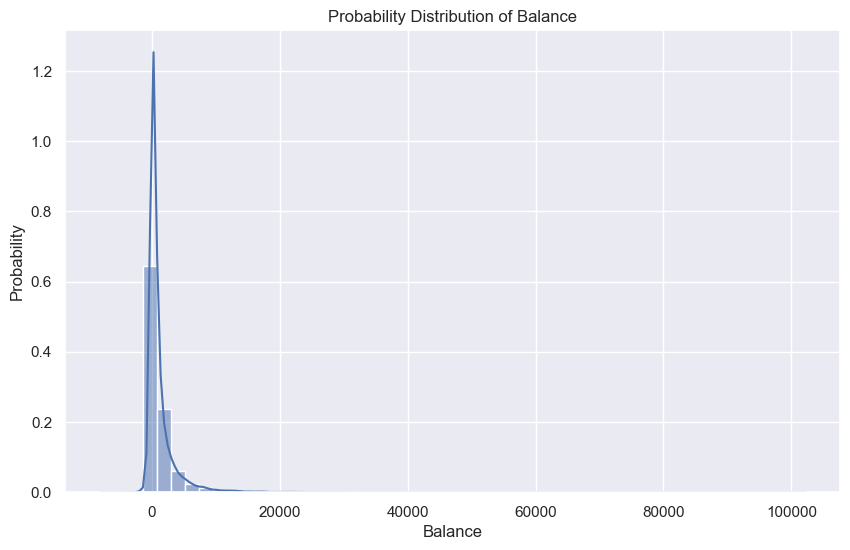

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(term_data['balance'], bins=50, kde=True, stat='probability')
plt.title('Probability Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Probability')
plt.show()

#### It is apparent that there are a lot of outliers. It would be prudent to break the balance feature down to some quartiles and then see the distribution

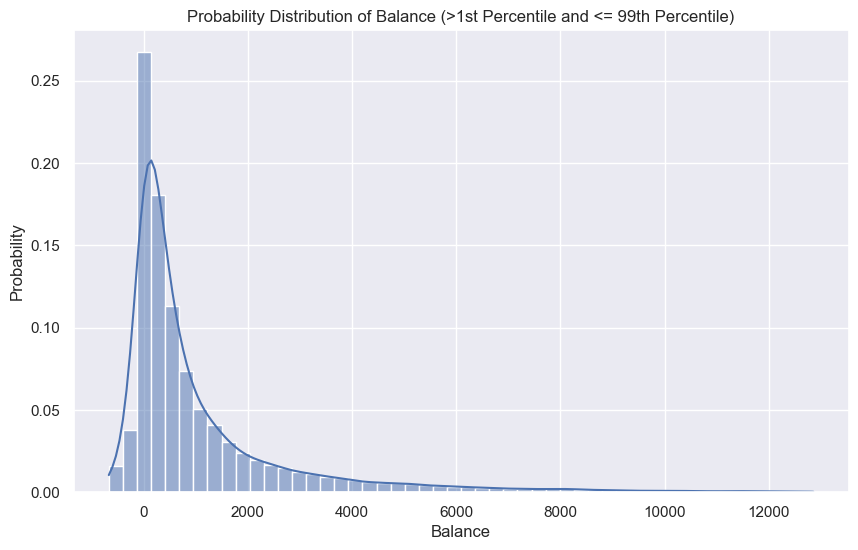

In [33]:
# Calculate the 99th percentile of the 'balance' column
balance_99 = term_data['balance'].quantile(0.99)
balance_1 = term_data['balance'].quantile(0.01)

# Filter the dataframe to include only balances below or equal to the 99th percentile
filtered_balance = term_data[(term_data['balance'] <= balance_99) & (term_data['balance'] >= balance_1)]['balance']

plt.figure(figsize=(10, 6))
sns.histplot(filtered_balance, bins=50, kde=True, stat='probability')
plt.title('Probability Distribution of Balance (>1st Percentile and <= 99th Percentile)')
plt.xlabel('Balance')
plt.ylabel('Probability')
plt.show()

In [35]:
filtered_balance_df = term_data[(term_data['balance'] <= balance_99) & (term_data['balance'] >= balance_1)]

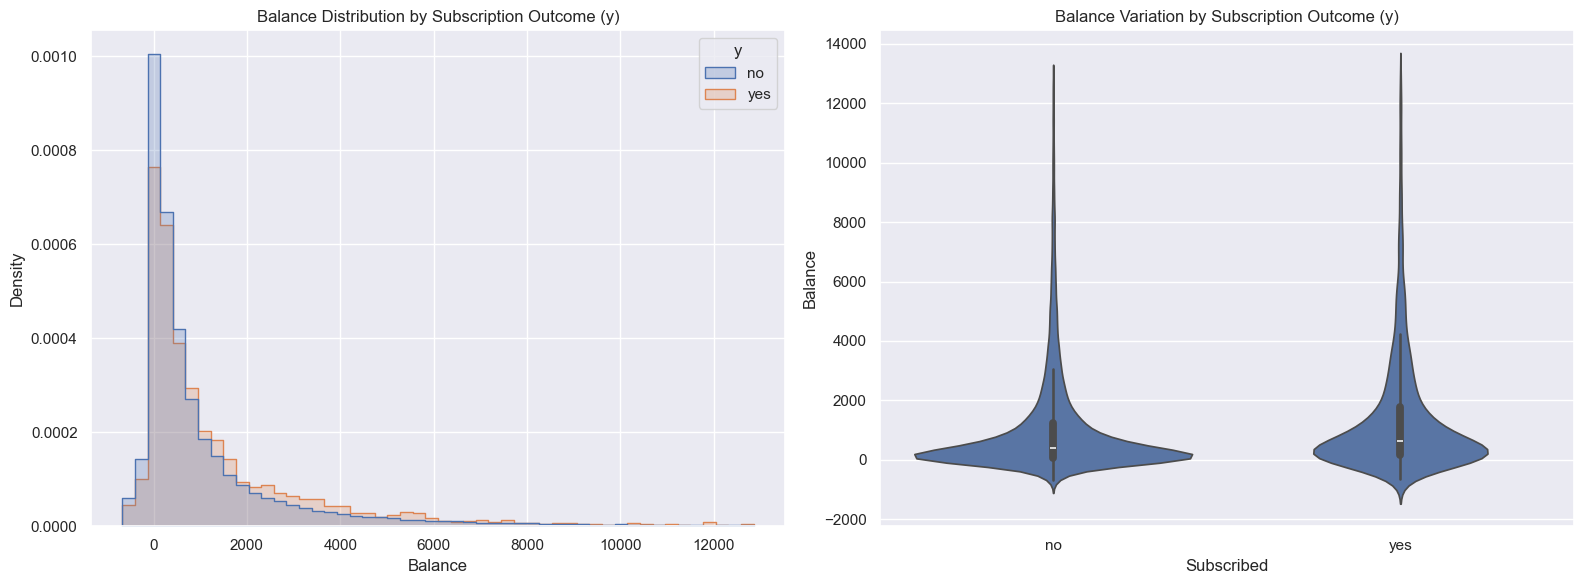

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram with hue by 'y'
sns.histplot(
    data=filtered_balance_df,
    x='balance',
    hue='y',
    bins=50,
    element='step',
    stat='density',
    common_norm=False,
    ax=axes[0]
)
axes[0].set_title('Balance Distribution by Subscription Outcome (y)')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Density')

# Violin plot by 'y'
sns.violinplot(
    data=filtered_balance_df,
    x='y',
    y='balance',
    ax=axes[1]
)
axes[1].set_title('Balance Variation by Subscription Outcome (y)')
axes[1].set_xlabel('Subscribed')
axes[1].set_ylabel('Balance')

plt.tight_layout()
plt.show()

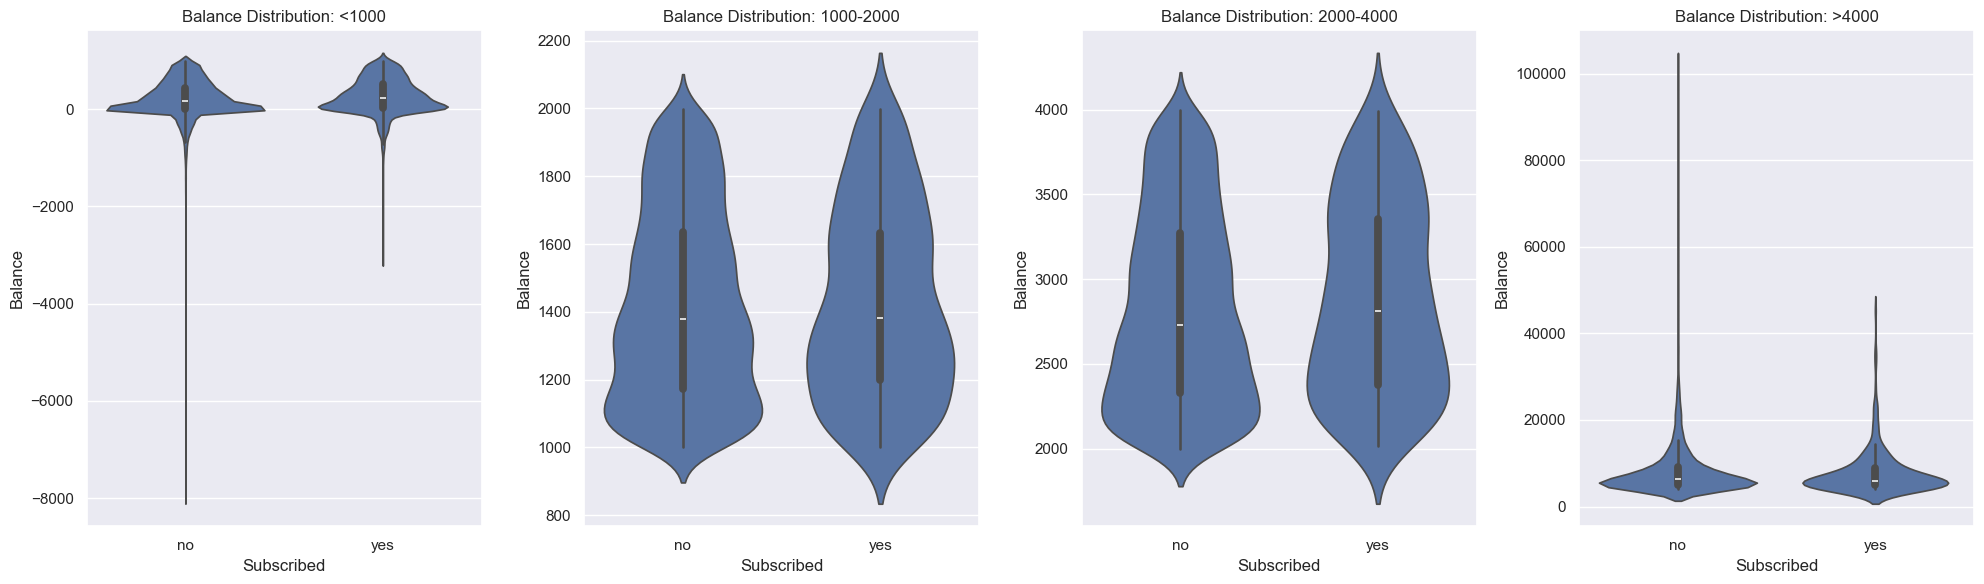

In [38]:
# Define bins and labels for balance categories
balance_bins = [-np.inf, 1000, 2000, 4000, np.inf]
balance_labels = ['<1000', '1000-2000', '2000-4000', '>4000']
term_data['balance_group'] = pd.cut(term_data['balance'], bins=balance_bins, labels=balance_labels, right=False)

# Prepare subplots for each balance group
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
for idx, balance_group in enumerate(balance_labels):
    ax = axes[idx]
    sns.violinplot(
        data=term_data[term_data['balance_group'] == balance_group],
        x='y', y='balance', ax=ax
    )
    ax.set_title(f'Balance Distribution: {balance_group}')
    ax.set_xlabel('Subscribed')
    ax.set_ylabel('Balance')

plt.tight_layout()
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_56432\2742348745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_balance_df['balance_group'] = pd.cut(


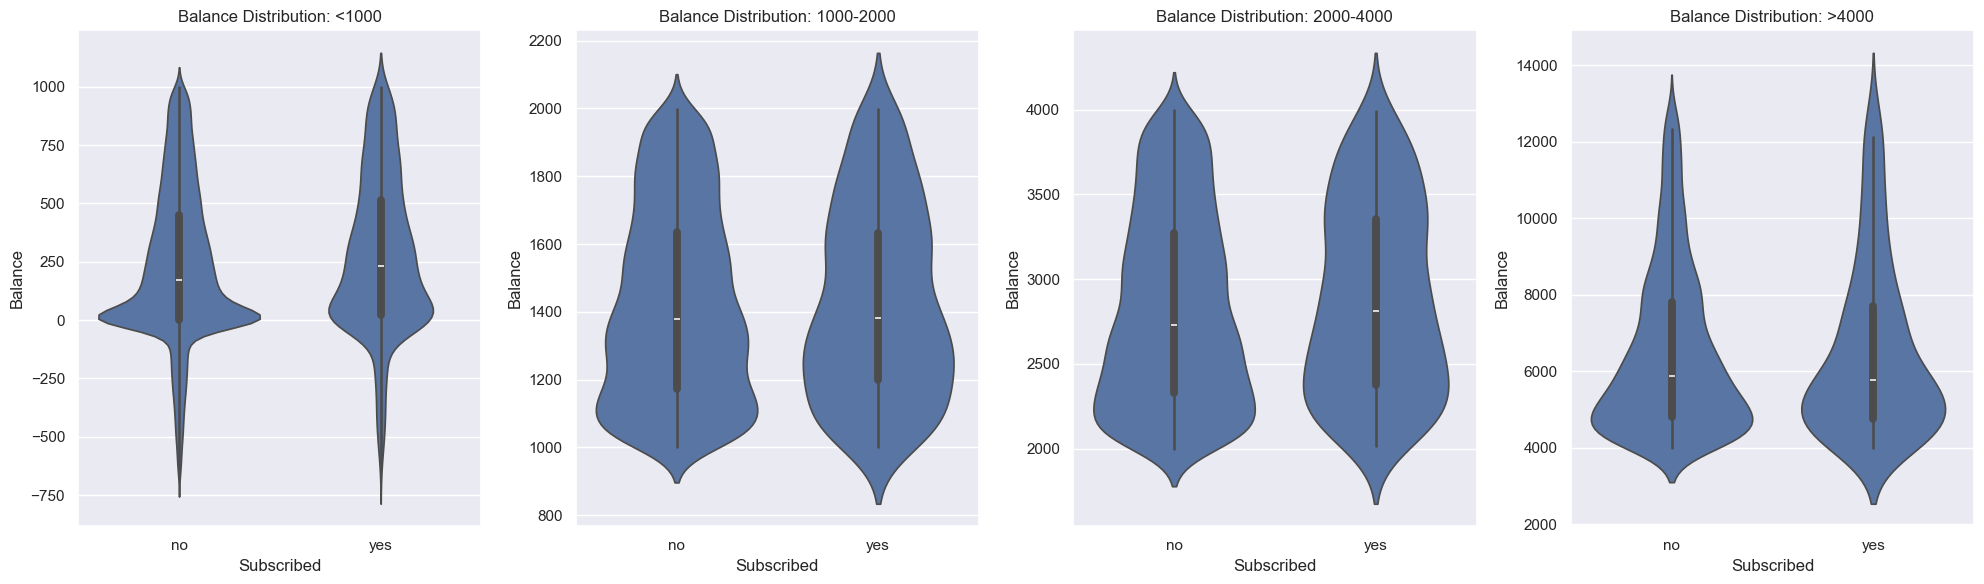

In [39]:
# Define bins and labels for balance categories on filtered_balance_df
filtered_balance_df['balance_group'] = pd.cut(
    filtered_balance_df['balance'],
    bins=balance_bins,
    labels=balance_labels,
    right=False
)

# Prepare subplots for each balance group in filtered_balance_df
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
for idx, balance_group in enumerate(balance_labels):
    ax = axes[idx]
    sns.violinplot(
        data=filtered_balance_df[filtered_balance_df['balance_group'] == balance_group],
        x='y', y='balance', ax=ax
    )
    ax.set_title(f'Balance Distribution: {balance_group}')
    ax.set_xlabel('Subscribed')
    ax.set_ylabel('Balance')

plt.tight_layout()
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_56432\1211284071.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_group_counts = term_data.groupby(['balance_group', 'y']).size().reset_index(name='count')
C:\Users\samar\AppData\Local\Temp\ipykernel_56432\1211284071.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_y_by_balance = term_data.groupby('balance_group')['y_encoded'].mean().reset_index()


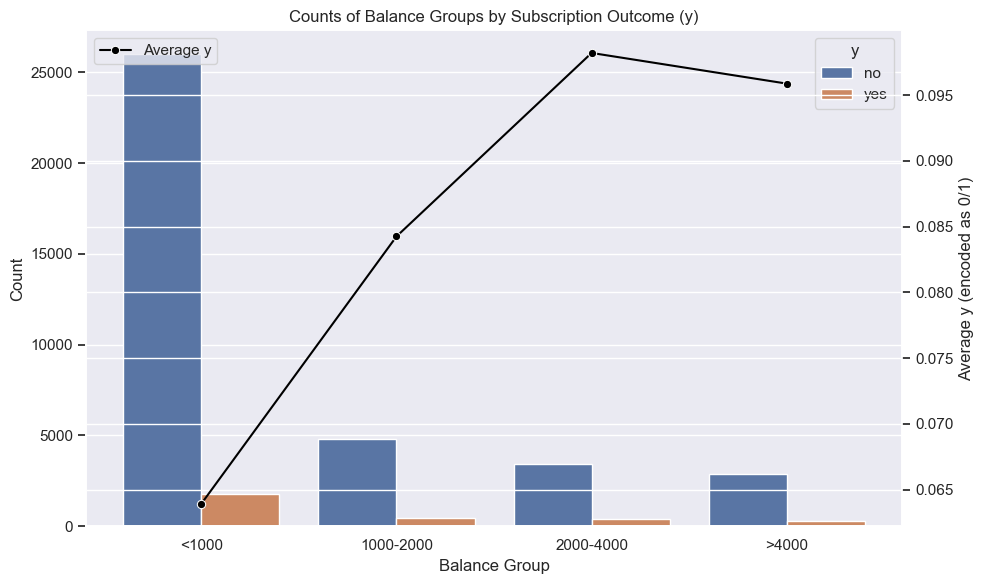

In [43]:
# Count of each balance_group by y
balance_group_counts = term_data.groupby(['balance_group', 'y']).size().reset_index(name='count')

# Average y (encoded as 0/1) by balance_group
avg_y_by_balance = term_data.groupby('balance_group')['y_encoded'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Barplot: counts by balance_group and y
sns.barplot(
    data=balance_group_counts,
    x='balance_group',
    y='count',
    hue='y',
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Balance Group')
ax1.set_title('Counts of Balance Groups by Subscription Outcome (y)')

# Line plot: average y_encoded by balance_group
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_balance,
    x='balance_group',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y'
)
ax2.set_ylabel('Average y (encoded as 0/1)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

#### The balance_group feature shows an increasing chances of subscription with increasing balance. This can be a feature for classification.

### JOB

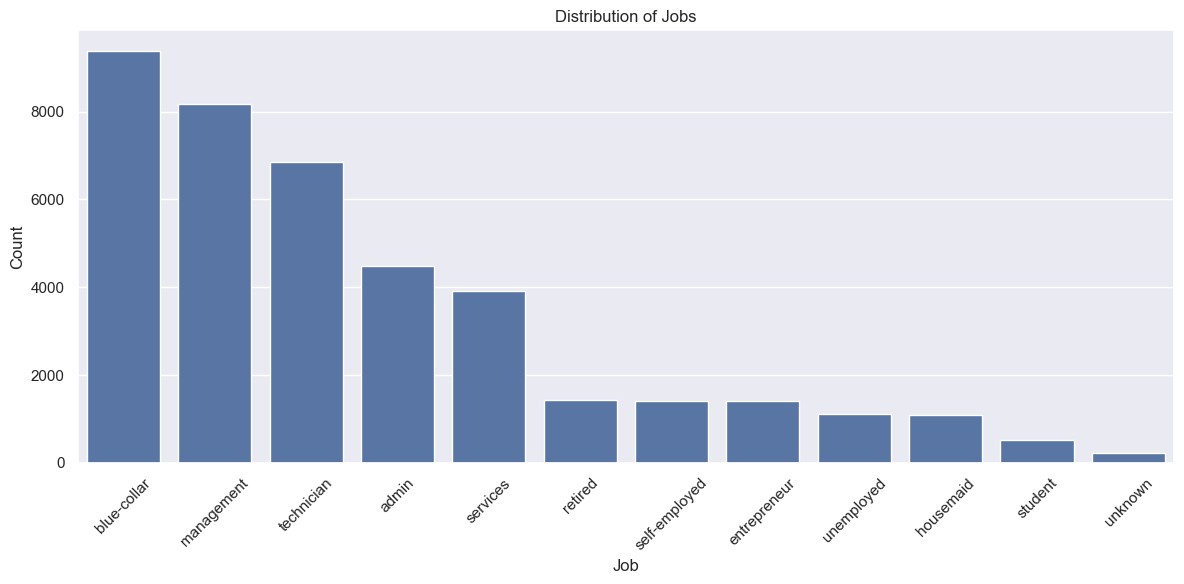

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(data=term_data, x='job', order=term_data['job'].value_counts().index)
plt.title('Distribution of Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_56432\809882503.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


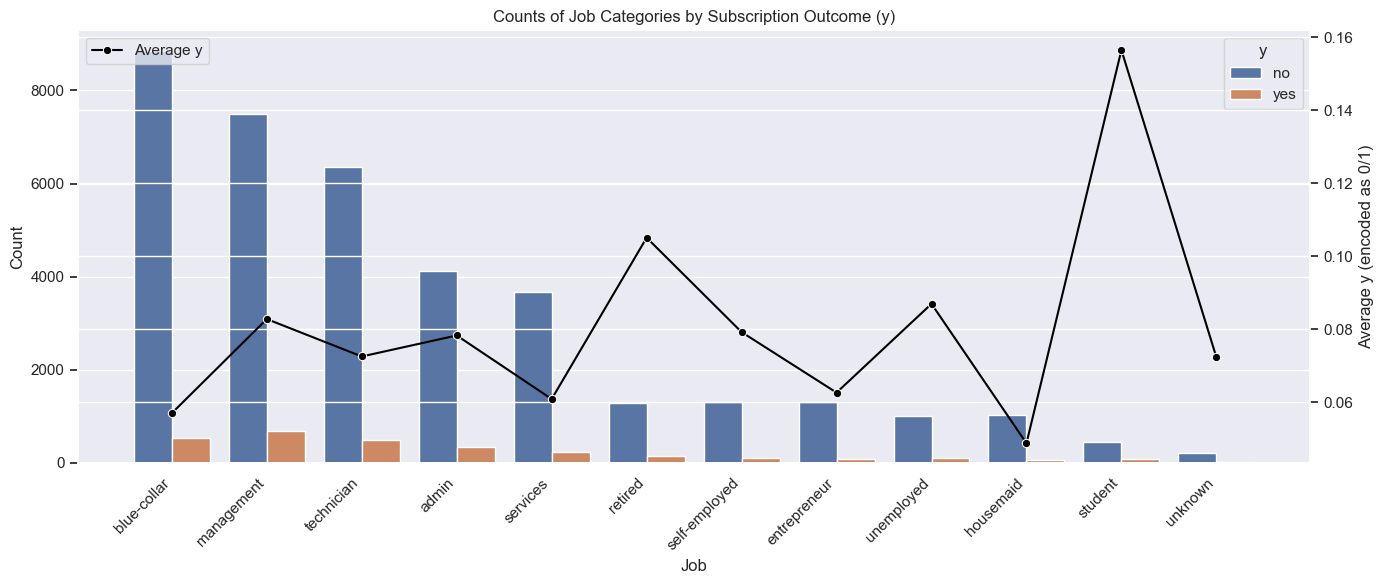

In [49]:
# Count of each job category by y
job_counts = term_data.groupby(['job', 'y']).size().reset_index(name='count')

# Average y (encoded as 0/1) by job
avg_y_by_job = term_data.groupby('job')['y_encoded'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(14, 6))

# Barplot: counts by job and y
sns.barplot(
    data=job_counts,
    x='job',
    y='count',
    hue='y',
    order=term_data['job'].value_counts().index,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Job')
ax1.set_title('Counts of Job Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Line plot: average y_encoded by job
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_job,
    x='job',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y'
)
ax2.set_ylabel('Average y (encoded as 0/1)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

#### Jobs can be grouped into fewer categories based on their closeness
* Blue-collar, housemaid involve manual labor.
* Technician, admin and services can be grouped together.
* Management and entrpreneur can be grouped togetehr.
* Retired, unemployed, self-employed and student can be grouped together.
* Unknown can be another category.

In [51]:
# Define mapping for job groups
job_group_map = {
    'blue-collar': 'manual_labor',
    'housemaid': 'manual_labor',
    'technician': 'office_support',
    'admin': 'office_support',
    'services': 'office_support',
    'management': 'management_entrepreneur',
    'entrepreneur': 'management_entrepreneur',
    'retired': 'not_working',
    'unemployed': 'not_working',
    'self-employed': 'not_working',
    'student': 'not_working',
    'unknown': 'unknown'
}

# Create new feature 'job_group'
term_data['job_group'] = term_data['job'].map(job_group_map)

C:\Users\samar\AppData\Local\Temp\ipykernel_56432\4181161673.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


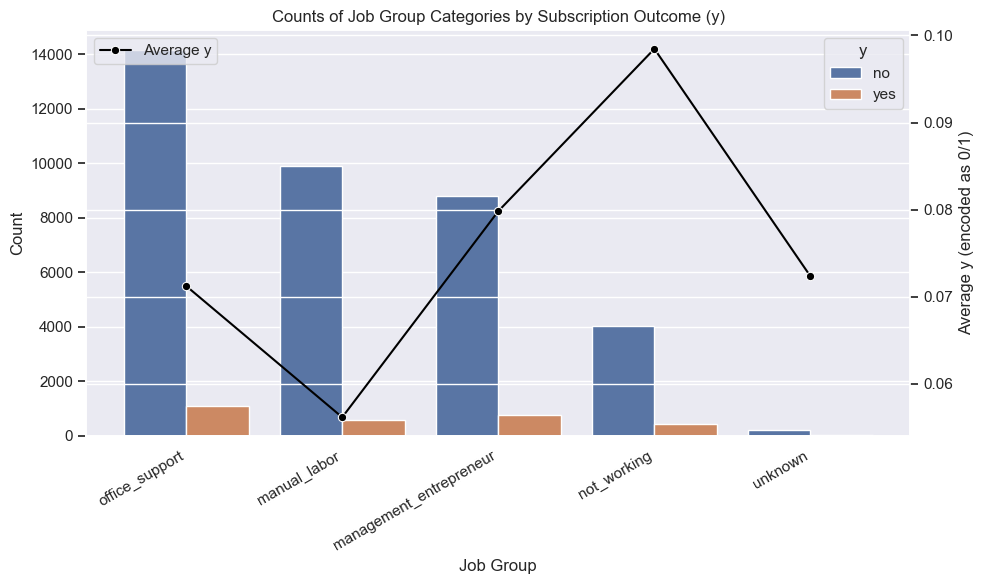

In [52]:
job_group_counts = term_data.groupby(['job_group', 'y']).size().reset_index(name='count')

# Average y (encoded as 0/1) by job_group
avg_y_by_job_group = term_data.groupby('job_group')['y_encoded'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Barplot: counts by job_group and y
sns.barplot(
    data=job_group_counts,
    x='job_group',
    y='count',
    hue='y',
    order=term_data['job_group'].value_counts().index,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Job Group')
ax1.set_title('Counts of Job Group Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# Line plot: average y_encoded by job_group
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_job_group,
    x='job_group',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y'
)
ax2.set_ylabel('Average y (encoded as 0/1)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_56432\509523226.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


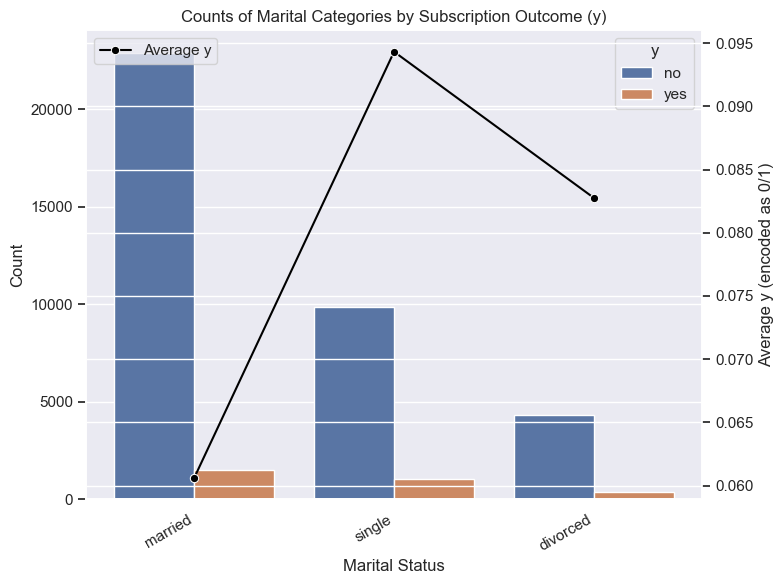

In [53]:
marital_counts = term_data.groupby(['marital', 'y']).size().reset_index(name='count')
avg_y_by_marital = term_data.groupby('marital')['y_encoded'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(8, 6))

# Barplot: counts by marital and y
sns.barplot(
    data=marital_counts,
    x='marital',
    y='count',
    hue='y',
    order=term_data['marital'].value_counts().index,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Marital Status')
ax1.set_title('Counts of Marital Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# Line plot: average y_encoded by marital
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_marital,
    x='marital',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y'
)
ax2.set_ylabel('Average y (encoded as 0/1)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_56432\180377641.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


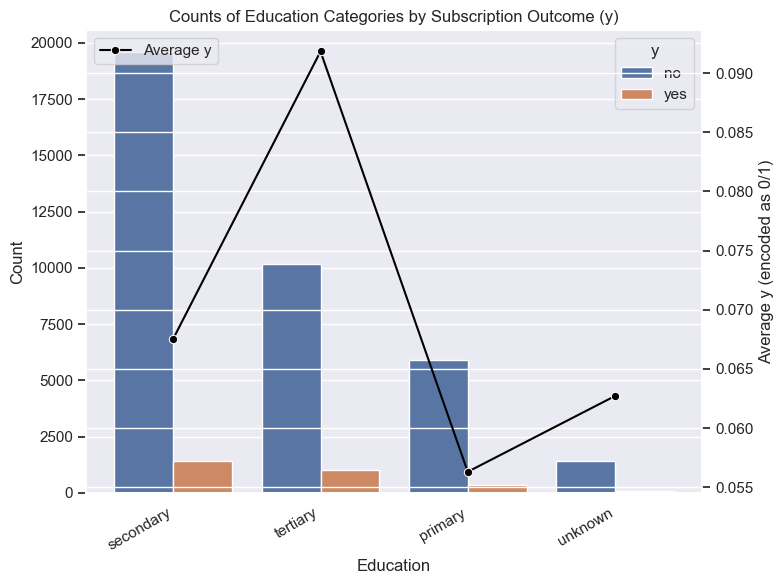

In [55]:
education_counts = term_data.groupby(['education', 'y']).size().reset_index(name='count')
avg_y_by_education = term_data.groupby('education')['y_encoded'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(8, 6))

# Barplot: counts by education and y
sns.barplot(
    data=education_counts,
    x='education',
    y='count',
    hue='y',
    order=term_data['education'].value_counts().index,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Education')
ax1.set_title('Counts of Education Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# Line plot: average y_encoded by education
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_education,
    x='education',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y'
)
ax2.set_ylabel('Average y (encoded as 0/1)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_56432\303576649.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


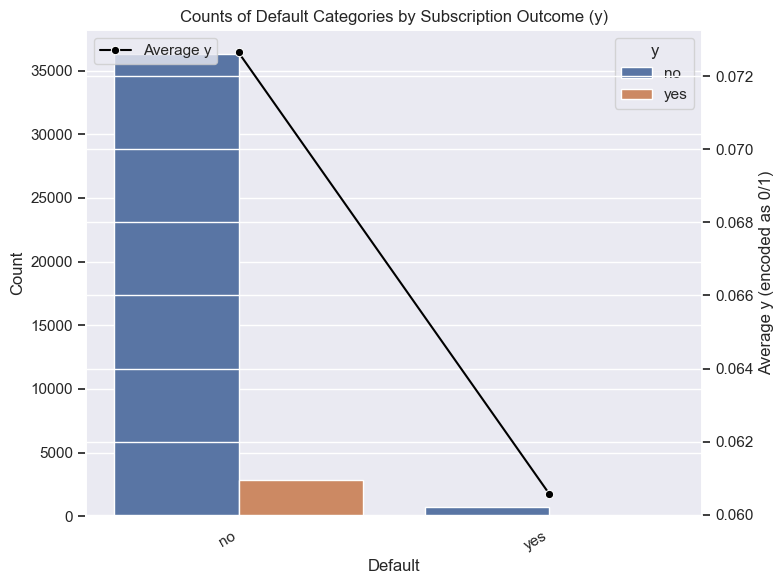

In [56]:
# Count of each default category by y
default_counts = term_data.groupby(['default', 'y']).size().reset_index(name='count')
avg_y_by_default = term_data.groupby('default')['y_encoded'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(8, 6))

# Barplot: counts by default and y
sns.barplot(
    data=default_counts,
    x='default',
    y='count',
    hue='y',
    order=term_data['default'].value_counts().index,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Default')
ax1.set_title('Counts of Default Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# Line plot: average y_encoded by default
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_default,
    x='default',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y'
)
ax2.set_ylabel('Average y (encoded as 0/1)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_56432\3132863419.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


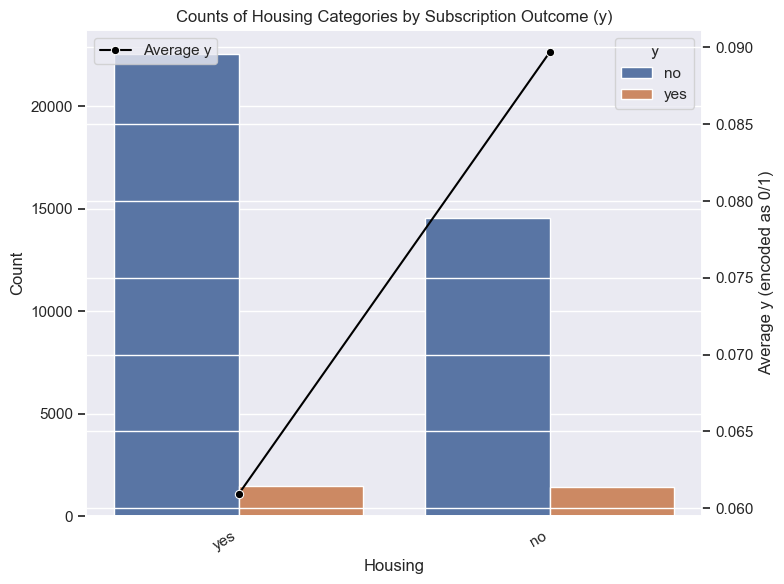

In [57]:
housing_counts = term_data.groupby(['housing', 'y']).size().reset_index(name='count')
avg_y_by_housing = term_data.groupby('housing')['y_encoded'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(8, 6))

# Barplot: counts by housing and y
sns.barplot(
    data=housing_counts,
    x='housing',
    y='count',
    hue='y',
    order=term_data['housing'].value_counts().index,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Housing')
ax1.set_title('Counts of Housing Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# Line plot: average y_encoded by housing
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_housing,
    x='housing',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y'
)
ax2.set_ylabel('Average y (encoded as 0/1)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_56432\49145689.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


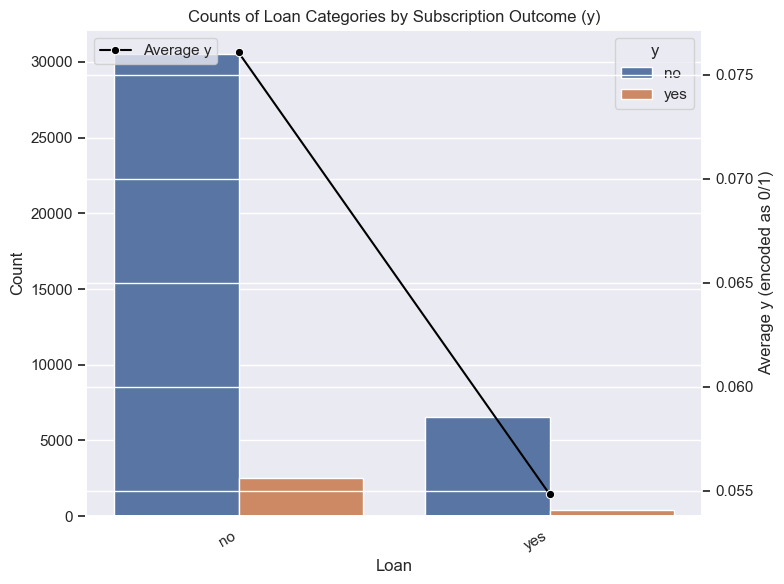

In [58]:
# Count of each loan category by y
loan_counts = term_data.groupby(['loan', 'y']).size().reset_index(name='count')
avg_y_by_loan = term_data.groupby('loan')['y_encoded'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(8, 6))

# Barplot: counts by loan and y
sns.barplot(
    data=loan_counts,
    x='loan',
    y='count',
    hue='y',
    order=term_data['loan'].value_counts().index,
    ax=ax1
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Loan')
ax1.set_title('Counts of Loan Categories by Subscription Outcome (y)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

# Line plot: average y_encoded by loan
ax2 = ax1.twinx()
sns.lineplot(
    data=avg_y_by_loan,
    x='loan',
    y='y_encoded',
    marker='o',
    color='black',
    ax=ax2,
    label='Average y'
)
ax2.set_ylabel('Average y (encoded as 0/1)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [62]:
term_data.to_csv('term-deposit-marketing-background-variables.csv', index=False)

In [63]:
term_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,age_group,age_group_new,balance_group,y_encoded,job_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,45-60,30-60,2000-4000,0,management_entrepreneur
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,30-45,30-60,<1000,0,office_support
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,30-45,30-60,<1000,0,management_entrepreneur
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,45-60,30-60,1000-2000,0,manual_labor
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,30-45,30-60,<1000,0,unknown


In [64]:
term_data['y'].value_counts()

y
no     37104
yes     2896
Name: count, dtype: int64